In [1]:
pip install flat_table

In [2]:
pip install streamlit

In [3]:
pip install pandas_profiling

In [4]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=1376509d2abfb0788a263a2859f7e4c2d9970f26c00cc4dd48ee19c82fa122df
  Stored in directory: /tmp/pip-ephem-wheel-cache-y51wt9tz/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [5]:
import pandas as pd
import numpy as np
import requests
import json
import io
import flat_table
#import streamlit
import pandas_profiling
import ast
from pandas_profiling import ProfileReport
from pandas.io.json import json_normalize
import seaborn as sns
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
columns = ['id','feed_id','feed_key']

In [8]:
response_df = pd.DataFrame(columns = columns)

In [9]:
#url= 'https://io.adafruit.com/api/v2/anurag004/feeds/terra1002/data?X-AIO-KEY=aio_yVFu33153a7DvzJ13IJmfbJvsHea'
url='https://io.adafruit.com/api/v2/anurag004/feeds/terra1002/data?X-AIO-KEY=aio_yVFu33153a7DvzJ13IJmfbJvsHea'

In [10]:
r = requests.get(url).json()

In [11]:
temp_df = pd.json_normalize(r)

In [12]:
response_df = response_df.append(temp_df, ignore_index=True)

In [13]:
response_df.head()

,id,feed_id,feed_key,value,created_at,created_epoch,expiration
0,0EPP1G49TDENMCP6TGH7V14ABE,1581260,terra1002,"{'result': {'ip':'192.168.31.151','id':'jt101'...",2021-04-01T11:03:02Z,1.617275e+09,2021-05-01T11:03:02Z
1,0EPP1FMC0PED8MES5ZSHQMZJ6H,1581260,terra1002,"{'result': {'ip':'192.168.31.151','id':'jt101'...",2021-04-01T11:02:10Z,1.617275e+09,2021-05-01T11:02:10Z
2,0EPP1F49XM3F7Z460XASX0S4P2,1581260,terra1002,"{'result': {'ip':'192.168.31.151','id':'jt101'...",2021-04-01T11:01:17Z,1.617275e+09,2021-05-01T11:01:17Z
3,0EPP1EKHR5D287H1YYV6N3XWXH,1581260,terra1002,"{'result': {'ip':'192.168.31.151','id':'jt101'...",2021-04-01T11:00:22Z,1.617275e+09,2021-05-01T11:00:22Z
4,0EPP1E3RRZK7PQ0GC8DF8CWW35,1581260,terra1002,"{'result': {'ip':'192.168.31.151','id':'jt101'...",2021-04-01T10:59:31Z,1.617275e+09,2021-05-01T10:59:31Z


In [14]:
response_df = response_df.drop(['id','feed_id','feed_key','created_at','created_epoch','expiration'],axis=1)

In [15]:
response_df = flat_table.normalize(response_df, expand_dicts=False, expand_lists=True)

In [16]:
response_df.head()

,index,value
0,0,"{'result': {'ip':'192.168.31.151','id':'jt101'..."
1,1,"{'result': {'ip':'192.168.31.151','id':'jt101'..."
2,2,"{'result': {'ip':'192.168.31.151','id':'jt101'..."
3,3,"{'result': {'ip':'192.168.31.151','id':'jt101'..."
4,4,"{'result': {'ip':'192.168.31.151','id':'jt101'..."


In [17]:
response_df['value'] =  response_df['value'].apply(lambda x: x.replace('}}',''). replace('}',''))

In [18]:
response_df['value'] = response_df['value'] + '}}'

In [19]:
#response_df['value'].value_counts()

In [20]:
def value_dict(d):
    '''
    Convert json string representation of dictionary to a python dict
    '''
    return ast.literal_eval(d)

In [21]:
value = json_normalize(response_df['value'].apply(value_dict).tolist())#.add_prefix('value.')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [22]:
value.head()

,result.ip,result.id,result.Date,result.Time,result.Temp,result.PM25,result.lux,result.VOC,result.CO,result.CO2,result.O3,result.RH,result.Pres
0,192.168.31.151,jt101,2021-04-01,16:33:01,35.89,0.0,81.76,7.0,3.47,400.0,0.0,24.08,978.20
1,192.168.31.151,jt101,2021-04-01,16:32:09,35.88,0.0,81.90,1.0,3.44,400.0,0.0,24.07,978.22
2,192.168.31.151,jt101,2021-04-01,16:31:16,35.96,0.0,80.94,24.0,3.47,400.0,0.0,24.04,978.30
3,192.168.31.151,jt101,2021-04-01,16:30:21,35.91,0.0,81.60,19.0,3.47,400.0,0.0,24.25,978.34
4,192.168.31.151,jt101,2021-04-01,16:29:29,35.88,0.0,81.44,0.0,3.47,400.0,0.0,24.02,978.28


In [23]:
value.columns = value.columns.str.replace('result.', '')

In [24]:
#value.to_csv('value.csv')

## EDA

In [25]:
activity = value
#activity = pd.read_csv('value.csv')

In [26]:
activity.head()

,ip,id,Date,Time,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
0,192.168.31.151,jt101,2021-04-01,16:33:01,35.89,0.0,81.76,7.0,3.47,400.0,0.0,24.08,978.20
1,192.168.31.151,jt101,2021-04-01,16:32:09,35.88,0.0,81.90,1.0,3.44,400.0,0.0,24.07,978.22
2,192.168.31.151,jt101,2021-04-01,16:31:16,35.96,0.0,80.94,24.0,3.47,400.0,0.0,24.04,978.30
3,192.168.31.151,jt101,2021-04-01,16:30:21,35.91,0.0,81.60,19.0,3.47,400.0,0.0,24.25,978.34
4,192.168.31.151,jt101,2021-04-01,16:29:29,35.88,0.0,81.44,0.0,3.47,400.0,0.0,24.02,978.28


In [27]:
activity= activity.drop(['ip','id','Date'], axis=1)
activity.head()

,Time,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
0,16:33:01,35.89,0.0,81.76,7.0,3.47,400.0,0.0,24.08,978.20
1,16:32:09,35.88,0.0,81.90,1.0,3.44,400.0,0.0,24.07,978.22
2,16:31:16,35.96,0.0,80.94,24.0,3.47,400.0,0.0,24.04,978.30
3,16:30:21,35.91,0.0,81.60,19.0,3.47,400.0,0.0,24.25,978.34
4,16:29:29,35.88,0.0,81.44,0.0,3.47,400.0,0.0,24.02,978.28


In [28]:
activity.shape

(1000, 10)

In [29]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1000 non-null   object 
 1   Temp    1000 non-null   float64
 2   PM25    1000 non-null   float64
 3   lux     1000 non-null   float64
 4   VOC     1000 non-null   float64
 5   CO      1000 non-null   float64
 6   CO2     1000 non-null   float64
 7   O3      1000 non-null   float64
 8   RH      1000 non-null   float64
 9   Pres    1000 non-null   float64
dtypes: float64(9), object(1)
memory usage: 78.2+ KB


In [30]:
activity.describe()

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,36.895120,0.018450,63.612730,2580.952000,7.885590,1847.559000,0.0,26.076210,978.974920
std,2.506371,0.058334,116.642971,10076.375189,11.858016,8522.870237,0.0,12.774876,1.212822
min,29.310000,0.000000,6.760000,0.000000,3.030000,400.000000,0.0,14.210000,976.580000
25%,34.660000,0.000000,16.017500,27.750000,3.540000,400.000000,0.0,19.030000,977.910000
50%,35.940000,0.000000,81.280000,170.500000,3.690000,400.000000,0.0,24.075000,979.015000
75%,39.670000,0.000000,84.390000,337.750000,3.992500,530.000000,0.0,27.225000,979.980000
max,42.940000,0.220000,1859.200000,60000.000000,61.490000,57330.000000,0.0,100.000000,981.110000


In [31]:
profile = ProfileReport(activity,
                        title='Harmful components Report',
                        html={'style':{'full_width': True}})

In [32]:
profile.to_file('activity.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Correlation of the Data

In [33]:
activity.cov()

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
Temp,6.281897,0.035713,-51.642889,4.328203e+03,7.051118,1.740053e+03,0.0,0.635682,-1.307815
PM25,0.035713,0.003403,-0.693602,3.240635e+02,0.602437,1.891739e+02,0.0,0.529003,-0.021230
lux,-51.642889,-0.693602,13605.582657,-7.513756e+04,-150.218473,-3.257725e+04,0.0,-68.545308,28.638060
VOC,4328.202869,324.063549,-75137.559208,1.015333e+08,89184.371990,7.638118e+07,0.0,86083.757676,-1191.305780
CO,7.051118,0.602437,-150.218473,8.918437e+04,140.612542,5.500936e+04,0.0,133.069593,-4.106653
CO2,1740.053101,189.173890,-32577.249015,7.638118e+07,55009.360826,7.263932e+07,0.0,42359.876896,-423.061262
O3,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000
RH,0.635682,0.529003,-68.545308,8.608376e+04,133.069593,4.235988e+04,0.0,163.197468,-2.564029
Pres,-1.307815,-0.021230,28.638060,-1.191306e+03,-4.106653,-4.230613e+02,0.0,-2.564029,1.470938


In [34]:
act_data= activity.corr()
act_data

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
Temp,1.000000,0.244259,-0.176647,0.171379,0.237247,0.081458,NaN,0.019854,-0.430233
PM25,0.244259,1.000000,-0.101936,0.551317,0.870914,0.380497,NaN,0.709867,-0.300070
lux,-0.176647,-0.101936,1.000000,-0.063928,-0.108606,-0.032770,NaN,-0.046000,0.202436
VOC,0.171379,0.551317,-0.063928,1.000000,0.746401,0.889398,NaN,0.668744,-0.097481
CO,0.237247,0.870914,-0.108606,0.746401,1.000000,0.544300,NaN,0.878436,-0.285548
CO2,0.081458,0.380497,-0.032770,0.889398,0.544300,1.000000,NaN,0.389056,-0.040928
O3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,0.019854,0.709867,-0.046000,0.668744,0.878436,0.389056,NaN,1.000000,-0.165489
Pres,-0.430233,-0.300070,0.202436,-0.097481,-0.285548,-0.040928,NaN,-0.165489,1.000000


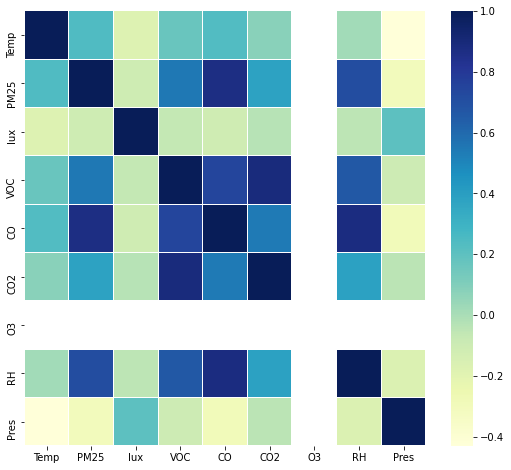

In [35]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(act_data, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [36]:
for i in activity.columns:
  for j in activity.columns:
    corr, _ = spearmanr(activity[i], activity[j])
    print(i, j, 'Spearmans correlation: %.3f' % corr)

Time Time Spearmans correlation: 1.000
Time Temp Spearmans correlation: -0.210
Time PM25 Spearmans correlation: 0.476
Time lux Spearmans correlation: 0.250
Time VOC Spearmans correlation: 0.044
Time CO Spearmans correlation: -0.003
Time CO2 Spearmans correlation: 0.157
Time O3 Spearmans correlation: nan
Time RH Spearmans correlation: 0.402
Time Pres Spearmans correlation: -0.306
Temp Time Spearmans correlation: -0.210
Temp Temp Spearmans correlation: 1.000
Temp PM25 Spearmans correlation: 0.190
Temp lux Spearmans correlation: -0.308
Temp VOC Spearmans correlation: -0.194
Temp CO Spearmans correlation: -0.108
Temp CO2 Spearmans correlation: -0.100
Temp O3 Spearmans correlation: nan
Temp RH Spearmans correlation: -0.508
Temp Pres Spearmans correlation: -0.453
PM25 Time Spearmans correlation: 0.476
PM25 Temp Spearmans correlation: 0.190
PM25 PM25 Spearmans correlation: 1.000
PM25 lux Spearmans correlation: -0.168
PM25 VOC Spearmans correlation: 0.271
PM25 CO Spearmans correlation: 0.504
P

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


CO2 CO Spearmans correlation: 0.283
CO2 CO2 Spearmans correlation: 1.000
CO2 O3 Spearmans correlation: nan
CO2 RH Spearmans correlation: 0.267
CO2 Pres Spearmans correlation: 0.172
O3 Time Spearmans correlation: nan
O3 Temp Spearmans correlation: nan
O3 PM25 Spearmans correlation: nan
O3 lux Spearmans correlation: nan
O3 VOC Spearmans correlation: nan
O3 CO Spearmans correlation: nan
O3 CO2 Spearmans correlation: nan
O3 O3 Spearmans correlation: nan
O3 RH Spearmans correlation: nan
O3 Pres Spearmans correlation: nan
RH Time Spearmans correlation: 0.402
RH Temp Spearmans correlation: -0.508
RH PM25 Spearmans correlation: 0.454
RH lux Spearmans correlation: 0.009
RH VOC Spearmans correlation: 0.524
RH CO Spearmans correlation: 0.677
RH CO2 Spearmans correlation: 0.267
RH O3 Spearmans correlation: nan
RH RH Spearmans correlation: 1.000
RH Pres Spearmans correlation: 0.081
Pres Time Spearmans correlation: -0.306
Pres Temp Spearmans correlation: -0.453
Pres PM25 Spearmans correlation: -0.33

Correlation of Parameters based on their MMaximum, Minimum, and Average Values

In [37]:
df1 = pd.DataFrame(columns=['Index of MaxValue','Parameters', 'MaxValue','MinValue','Average'])
for i in activity.columns.drop('Time'):
  maxValue = activity[i].max()
  minValue = activity[i].min()
  average = activity[i].mean()
  maxValueIndex = activity[i].idxmax()
  df1 = df1.append({'Index of MaxValue': maxValueIndex,'Parameters': i, 'MaxValue': maxValue, 'MinValue': minValue, 'Average': average}, ignore_index=True)

In [38]:
df1

,Index of MaxValue,Parameters,MaxValue,MinValue,Average
0,499,Temp,42.94,29.31,36.89512
1,495,PM25,0.22,0.00,0.01845
2,789,lux,1859.20,6.76,63.61273
3,498,VOC,60000.00,0.00,2580.95200
4,501,CO,61.49,3.03,7.88559
5,526,CO2,57330.00,400.00,1847.55900
6,0,O3,0.00,0.00,0.00000
7,499,RH,100.00,14.21,26.07621
8,337,Pres,981.11,976.58,978.97492


In [39]:
df2= pd.DataFrame(columns=['Time of MaxValue'])
for i in df1['Index of MaxValue']:
  Time = activity._get_value(i, 0, takeable=True)
  #print(Time)
  df2 = df2.append({'Time of MaxValue': Time}, ignore_index=True)

In [40]:
df2

,Time of MaxValue
0,17:05:07
1,17:09:29
2,09:44:57
3,17:05:59
4,17:00:42
5,16:29:42
6,16:33:01
7,17:05:07
8,10:30:57


In [41]:
df= pd.concat([df1,df2], axis=1)

In [42]:
df

,Index of MaxValue,Parameters,MaxValue,MinValue,Average,Time of MaxValue
0,499,Temp,42.94,29.31,36.89512,17:05:07
1,495,PM25,0.22,0.00,0.01845,17:09:29
2,789,lux,1859.20,6.76,63.61273,09:44:57
3,498,VOC,60000.00,0.00,2580.95200,17:05:59
4,501,CO,61.49,3.03,7.88559,17:00:42
5,526,CO2,57330.00,400.00,1847.55900,16:29:42
6,0,O3,0.00,0.00,0.00000,16:33:01
7,499,RH,100.00,14.21,26.07621,17:05:07
8,337,Pres,981.11,976.58,978.97492,10:30:57


In [43]:
df = df.drop(['Time of MaxValue','Index of MaxValue'], axis = 1)
df

,Parameters,MaxValue,MinValue,Average
0,Temp,42.94,29.31,36.89512
1,PM25,0.22,0.00,0.01845
2,lux,1859.20,6.76,63.61273
3,VOC,60000.00,0.00,2580.95200
4,CO,61.49,3.03,7.88559
5,CO2,57330.00,400.00,1847.55900
6,O3,0.00,0.00,0.00000
7,RH,100.00,14.21,26.07621
8,Pres,981.11,976.58,978.97492


In [44]:
df = df.set_index('Parameters')#, inplace=True)
df

,MaxValue,MinValue,Average
Parameters,,,
Temp,42.94,29.31,36.89512
PM25,0.22,0.00,0.01845
lux,1859.20,6.76,63.61273
VOC,60000.00,0.00,2580.95200
CO,61.49,3.03,7.88559
CO2,57330.00,400.00,1847.55900
O3,0.00,0.00,0.00000
RH,100.00,14.21,26.07621
Pres,981.11,976.58,978.97492


In [45]:
df.index.name = None

In [46]:
df_t = df.transpose()
df_t

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
MaxValue,42.94000,0.22000,1859.20000,60000.000,61.49000,57330.000,0.0,100.00000,981.11000
MinValue,29.31000,0.00000,6.76000,0.000,3.03000,400.000,0.0,14.21000,976.58000
Average,36.89512,0.01845,63.61273,2580.952,7.88559,1847.559,0.0,26.07621,978.97492


In [47]:
df_t.corrwith(df_t, axis=1)

MaxValue    1.0
MinValue    1.0
Average     1.0
dtype: float64

In [48]:
data = df_t.cov()
data

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
Temp,46.641920,0.726149,6.089017e+03,1.974113e+05,1.929454e+02,1.870534e+05,0.0,2.843641e+02,15.469326
PM25,0.726149,0.014894,1.284144e+02,4.136738e+03,3.959126e+00,3.955632e+03,0.0,5.665345e+00,0.245185
lux,6089.016926,128.414391,1.109817e+06,3.573234e+07,3.413685e+04,3.419421e+07,0.0,4.872201e+04,2060.238901
VOC,197411.347585,4136.737948,3.573234e+07,1.150601e+09,1.099674e+06,1.100881e+09,0.0,1.570443e+06,66762.572428
CO,192.945376,3.959126,3.413685e+04,1.099674e+06,1.052430e+03,1.051543e+06,0.0,1.505924e+03,65.150376
CO2,187053.417779,3955.632241,3.419421e+07,1.100881e+09,1.051543e+06,1.053570e+09,0.0,1.500446e+06,63303.189688
O3,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000
RH,284.364128,5.665345,4.872201e+04,1.570443e+06,1.505924e+03,1.500446e+06,0.0,2.160910e+03,95.813422
Pres,15.469326,0.245185,2.060239e+03,6.676257e+04,6.515038e+01,6.330319e+04,0.0,9.581342e+01,5.135851


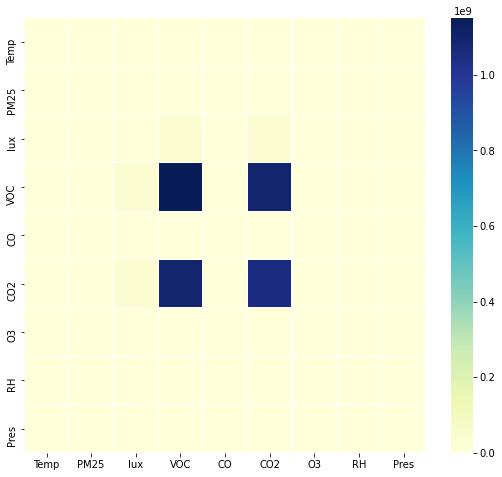

In [49]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(data, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [50]:
for i in df_t.columns:
  for j in df_t.columns:
    corr, _ = spearmanr(df_t[i], df_t[j])
    print(i, j, 'Spearmans correlation: %.3f' % corr)

Temp Temp Spearmans correlation: 1.000
Temp PM25 Spearmans correlation: 1.000
Temp lux Spearmans correlation: 1.000
Temp VOC Spearmans correlation: 1.000
Temp CO Spearmans correlation: 1.000
Temp CO2 Spearmans correlation: 1.000
Temp O3 Spearmans correlation: nan
Temp RH Spearmans correlation: 1.000
Temp Pres Spearmans correlation: 1.000
PM25 Temp Spearmans correlation: 1.000
PM25 PM25 Spearmans correlation: 1.000
PM25 lux Spearmans correlation: 1.000
PM25 VOC Spearmans correlation: 1.000
PM25 CO Spearmans correlation: 1.000
PM25 CO2 Spearmans correlation: 1.000
PM25 O3 Spearmans correlation: nan
PM25 RH Spearmans correlation: 1.000
PM25 Pres Spearmans correlation: 1.000
lux Temp Spearmans correlation: 1.000
lux PM25 Spearmans correlation: 1.000
lux lux Spearmans correlation: 1.000
lux VOC Spearmans correlation: 1.000
lux CO Spearmans correlation: 1.000
lux CO2 Spearmans correlation: 1.000
lux O3 Spearmans correlation: nan
lux RH Spearmans correlation: 1.000
lux Pres Spearmans correlat

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Correlation of Parameters based on their maximum values


In [51]:
df_t.corr()

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
Temp,1.000000,0.871233,0.846318,0.852161,0.870862,0.843812,NaN,0.895712,0.999487
PM25,0.871233,1.000000,0.998816,0.999293,1.000000,0.998577,NaN,0.998632,0.886514
lux,0.846318,0.998816,1.000000,0.999939,0.998852,0.999989,NaN,0.994904,0.862950
VOC,0.852161,0.999293,0.999939,1.000000,0.999321,0.999876,NaN,0.995959,0.868489
CO,0.870862,1.000000,0.998852,0.999321,1.000000,0.998617,NaN,0.998592,0.886164
CO2,0.843812,0.998577,0.999989,0.999876,0.998617,1.000000,NaN,0.994421,0.860573
O3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,0.895712,0.998632,0.994904,0.995959,0.998592,0.994421,NaN,1.000000,0.909498
Pres,0.999487,0.886514,0.862950,0.868489,0.886164,0.860573,NaN,0.909498,1.000000


In [52]:
max_df = df.drop(['MinValue', 'Average'], axis = 1)
max_df

,MaxValue
Temp,42.94
PM25,0.22
lux,1859.20
VOC,60000.00
CO,61.49
CO2,57330.00
O3,0.00
RH,100.00
Pres,981.11


In [53]:
max_df_t = max_df.transpose()
max_df_t

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
MaxValue,42.94,0.22,1859.2,60000.0,61.49,57330.0,0.0,100.0,981.11


In [54]:
max_df_t = pd.concat([max_df_t]*11, ignore_index=True)
print(max_df_t)


     Temp  PM25     lux      VOC     CO      CO2   O3     RH    Pres
0   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
1   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
2   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
3   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
4   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
5   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
6   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
7   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
8   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
9   42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11
10  42.94  0.22  1859.2  60000.0  61.49  57330.0  0.0  100.0  981.11


In [55]:
max_df_t.corrwith(max_df_t, axis=1)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
dtype: float64

In [56]:
max_df_t.cov()

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
Temp,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
PM25,0.0,8.474092e-34,0.0,0.0,0.0,0.0,0.0,0.0,3.470988e-30
lux,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
VOC,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
CO,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
CO2,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
O3,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
RH,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
Pres,0.0,3.470988e-30,0.0,0.0,0.0,0.0,0.0,0.0,1.421717e-26


In [57]:
max_data = max_df_t.corr()
max_data

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres
Temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM25,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
lux,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
VOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pres,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0


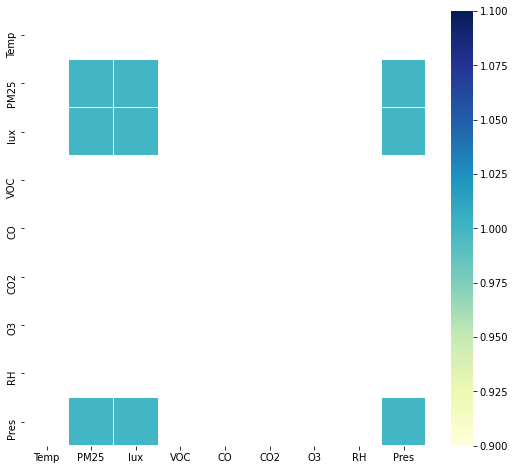

In [58]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(max_data, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [59]:
for i in max_df_t.columns:
  for j in max_df_t.columns:
    corr, _ = spearmanr(max_df_t[i], max_df_t[j])
    print(i, j, 'Spearmans correlation: %.3f' % corr)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


Temp Temp Spearmans correlation: nan
Temp PM25 Spearmans correlation: nan
Temp lux Spearmans correlation: nan
Temp VOC Spearmans correlation: nan
Temp CO Spearmans correlation: nan
Temp CO2 Spearmans correlation: nan
Temp O3 Spearmans correlation: nan
Temp RH Spearmans correlation: nan
Temp Pres Spearmans correlation: nan
PM25 Temp Spearmans correlation: nan
PM25 PM25 Spearmans correlation: nan
PM25 lux Spearmans correlation: nan
PM25 VOC Spearmans correlation: nan
PM25 CO Spearmans correlation: nan
PM25 CO2 Spearmans correlation: nan
PM25 O3 Spearmans correlation: nan
PM25 RH Spearmans correlation: nan
PM25 Pres Spearmans correlation: nan
lux Temp Spearmans correlation: nan
lux PM25 Spearmans correlation: nan
lux lux Spearmans correlation: nan
lux VOC Spearmans correlation: nan
lux CO Spearmans correlation: nan
lux CO2 Spearmans correlation: nan
lux O3 Spearmans correlation: nan
lux RH Spearmans correlation: nan
lux Pres Spearmans correlation: nan
VOC Temp Spearmans correlation: nan
V